In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import neighbors
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [24]:
amazon_books_bestsellers = pd.read_csv('bestsellers with categories.csv')

In [25]:
amazon_books_bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [26]:
amazon_books_bestsellers.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [27]:
amazon_books_bestsellers.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

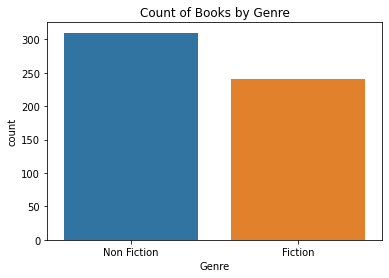

In [28]:
sns.countplot(x = 'Genre', data = amazon_books_bestsellers)
plt.title('Count of Books by Genre')
plt.show()

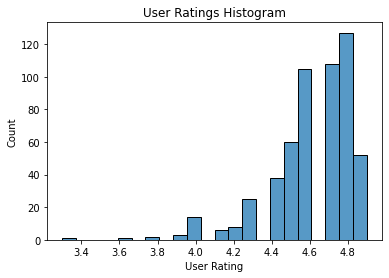

In [29]:
sns.histplot(data = amazon_books_bestsellers, x = 'User Rating')
plt.title('User Ratings Histogram')
plt.show()

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
author_encoded = le.fit_transform(amazon_books_bestsellers['Author'])
print(author_encoded)

[114 219 134  95 174  96  96  12 115  89  89 143 119 149 222   5  29  29
  48 204  21  21 241  44 141 101 175 159  51  16 110 110 168 168  22 227
 227  34 221 101  26  26 120 212  60 234 226 226 226  45  88  88  88 140
 154 154   0   0  32 150  37  37  37 202 202 202 202  98 239  10  10 120
 120 120 148 241 241 241 247 219 120  58  58  58  58  58  58  58 120 161
  54  65  65 126 126 221 221 228 228 127 194 194 113  30  76  76  76  76
  76 167 203 203 203 203 203 166 189 130  97  97  97 184  33  99  99  99
  99  99 190 190 190 101 104   2 210 100 100 100 187 124 124 124 124 152
 152 152 215 215  63  76 191 146 185 113 113 112 113 113 213 112 170 238
 238 111 111 125  52  52  52  52  52 108  31  31  31   9 107 117  19  19
  93  84  53  47 122 122 147 211 211 211 211 211 211 189 219  61  27  27
  27  27  27  27  27  20 199 199 199 123 199 199 199 199 199 216 243 176
 158 138  43   8  36 128 198 201 201 125 110   4 135 205 205 205   1  35
  35  35 226 226 226  50  14 221  80 157 183  73  7

In [32]:
amazon_books_bestsellers['author_encoded'] = author_encoded
amazon_books_bestsellers = amazon_books_bestsellers[['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'author_encoded', 'Genre']]
amazon_books_bestsellers.head()

,Name,Author,User Rating,Reviews,Price,Year,author_encoded,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,114,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,219,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,134,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,95,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,174,Non Fiction


In [20]:
target_encoded = le.fit_transform(amazon_books_bestsellers['Genre'])
print(target_encoded)

[1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 

In [43]:
features = amazon_books_bestsellers.iloc[: , 2:6]
target = target_encoded

In [44]:
features

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [45]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size = 0.25, random_state = 123)

In [64]:
knn = neighbors.KNeighborsClassifier(n_neighbors=20)
model = knn.fit(train_x, train_y)
pred = model.predict(test_x)

In [65]:
print(pred)

[0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0]


In [66]:
print(sqrt(metrics.mean_squared_error(test_y, pred)))

0.6756639246921762


In [50]:
#Find the most optimal k-value
score = []
pred = 0
for i in range(1,50):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    model = knn.fit(train_x, train_y)
    pred = model.predict(test_x)
    score.append(sqrt(metrics.mean_squared_error(test_y, pred)))

<AxesSubplot:>

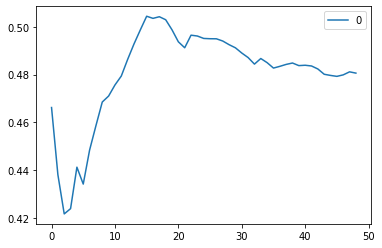

In [51]:
#plot RMSE against all k-values
curve = pd.DataFrame(score)
curve.plot()